#  Images: rows, columns and all that jazzy mess....

Two dimensional data arrays are normally stored in column-major or row-major order. In row-major order consecutive elements of the rows are stored next to each other in memory. In column-major order consecutive elements of the columns are stored next to each other in memory. See also https://en.wikipedia.org/wiki/Matrix_representation


For the usual mathematical matrix notation $A_{ij}$, where $i$ is the row, and $j$ the column, we have:
$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \end{bmatrix}
$$
Classic languages such as Fortran store their arrays in so-called column-major order. FDATA(NC,NR), and indices started at 1 with the first versions.
More modern language, such a C, store their arrays in row-major order,  CDATA[NR][NC], with indices starting at 0.

Images are often referred to in X and Y coordinates, like a mathematical system. The origin would be at (0,0) in the lower left corner. Image processing software normally puts the (0,0) origin at the top left corner. This, together with row-major and column-major can make it challenging to interchange data and plot them on the screen.

Add to this that for very large data, re-ordering axes can be a very expensive operation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
# import pyfits as fits               # deprecated
from astropy.io import fits         

Get the Header-Data-Units (hdu's) from a fits file. This particular one only has 1.

In [2]:
hdu = fits.open('../data/cube432.fits')
print(len(hdu))

1


In [3]:
h = hdu[0].header
d = hdu[0].data

print(d.shape)
print(d)

(2, 3, 4)
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


In [4]:
d1 = np.zeros(2*3*4).reshape(2,3,4)
for z in range(2):
    for y in range(3):
        for x in range(4):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


In [5]:
print(d1.flatten())

[   0.    1.    2.    3.   10.   11.   12.   13.   20.   21.   22.   23.
  100.  101.  102.  103.  110.  111.  112.  113.  120.  121.  122.  123.]


[[  0.   1.   2.   3.]
 [ 10.  11.  12.  13.]
 [ 20.  21.  22.  23.]]


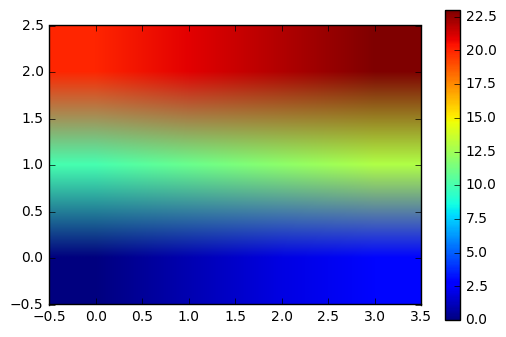

In [6]:
p0 = d[0,:,:]
p1 = d[1,:,:]
print(p0)
plt.imshow(p0,origin='lower')
plt.colorbar()

Note that for a small 4x3 matrix this image has been artificially made smooth by interpolating in imshow(); however you can already see that the integer coordinates are at the center of a cell:  (0.0) is the center of the lower left cell. This is a little more when you turn off interpolation:


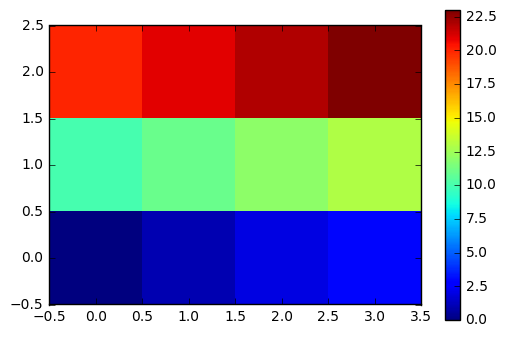

In [7]:
plt.imshow(p0,origin='lower',interpolation='none')
plt.colorbar()

In [8]:
# if you want to print the array on the screen with 0 at the bottom left, use the np.flipup() function:
print(np.flipud(p0))

[[ 20.  21.  22.  23.]
 [ 10.  11.  12.  13.]
 [  0.   1.   2.   3.]]


## CASA

CASA is a python package used in radio astronomy (ALMA, VLA etc.), but is peculiar in the sense that it caters to astronomers with a fortran background, or mathematicians with a DATA(x,y) expectation: CASA uses column-major arrays with an index starting at 0. CASA images can also store a mask alongside the data, but the logic is the reverse from the masking used in **numpy.ma**: in CASA a True means a good data point, in numpy it means a bad point!

Notebooks don't work within casa (yet), but if you install **casacore** in your local python, the examples below should work. The [kernsuite](http://kernsuite.info/) software should give you one easy option to install casacore, another way is to compile the code directly from https://github.com/casacore/casacore

Hence the example here is shown inline, and not in the notebook form yet. (note CASA currently uses python2)

```
casa

ia.open('../data/cube432.fits')
d1 = ia.getchunk()
d1.shape
 (4,3,2)
d1[3,2,1]
  123.0
  
print d1
[[[   0.  100.]
  [  10.  110.]
  [  20.  120.]]

 [[   1.  101.]
  [  11.  111.]
  [  21.  121.]]

 [[   2.  102.]
  [  12.  112.]
  [  22.  122.]]

 [[   3.  103.]
  [  13.  113.]
  [  23.  123.]]]

p0 = d1[:,:,0]

print p0
[[  0.  10.  20.]
 [  1.  11.  21.]
 [  2.  12.  22.]
 [  3.  13.  23.]]
 
print np.flipud(np.rot90(p0))
[[  0.   1.   2.   3.]
 [ 10.  11.  12.  13.]
 [ 20.  21.  22.  23.]]
 
print np.flipud(np.rot90(p0)).flatten()
[  0.   1.   2.   3.  10.  11.  12.  13.  20.  21.  22.  23.]

# or create the array from scratch
ia.fromshape(shape=[4,3,2])
p2 = ia.getchunk()
p2.shape
 (4,3,2)
etc.etc.

```


## casacore and casacore-python

Using just casacore, you will find the equivalent getchunk() is now called getdata() and converts to a proper numpy array without the need for np.rot90() and np.flipud(). The casacore-python version is able to work in python3 as well.

In [9]:
try:
    import casacore.images.image as image
    im = image('cube432.fits')
    print(im.shape())           #   ->   [1, 2, 3, 4]
    print(im.datatype())        #   -> 'float'
    d=im.getdata()
    m=im.getmask()
    print(d.shape)              # -> (1,2,3,4)
    """
   [[[[   0.    1.    2.    3.]
      [  10.   11.   12.   13.]
      [  20.   21.   22.   23.]]

     [[ 100.  101.  102.  103.]
      [ 110.  111.  112.  113.]
      [ 120.  121.  122.  123.]]
   """
except:
    print("no casacore")

no casacore
